In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

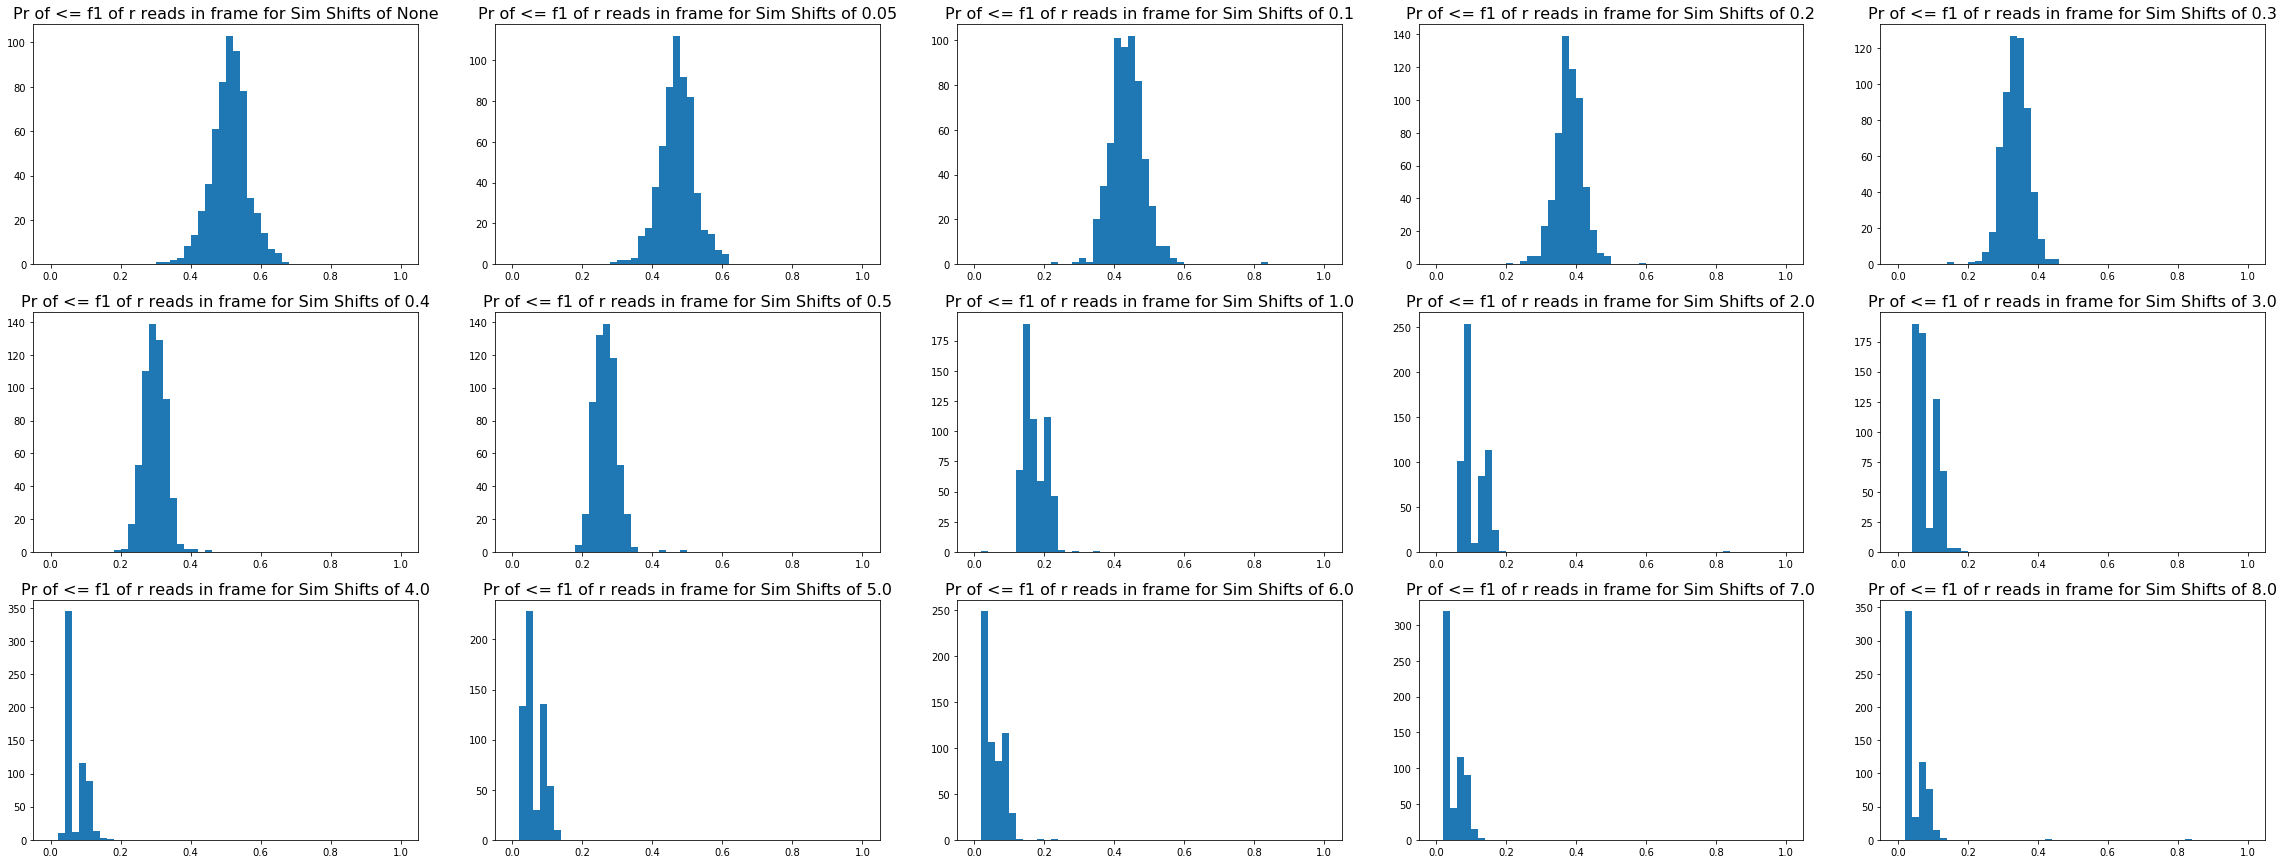

In [7]:
inFile = open("output/all_jan2014_25_to_32_starts_simulated_shifts_approach_4_theoretic_distributions", "r")
import matplotlib.pyplot as plt
from pylab import *
figure(figsize=(40,15))

level = inFile.readline().strip()
counter = 1
while level:
    dist = inFile.readline().strip().split(",")
    dist = [float(x) for x in dist[:-1]]
    ax=subplot(3, 5, counter)
    ax.hist(dist, bins=50, range=(0.0, 1.0))
    #if (level == "None"):
    #    print(sorted(dist))
    title("Pr of <= f1 of r reads in frame for Sim Shifts of " + level,fontsize=16)
    counter+= 1
    level = inFile.readline().strip()
show()

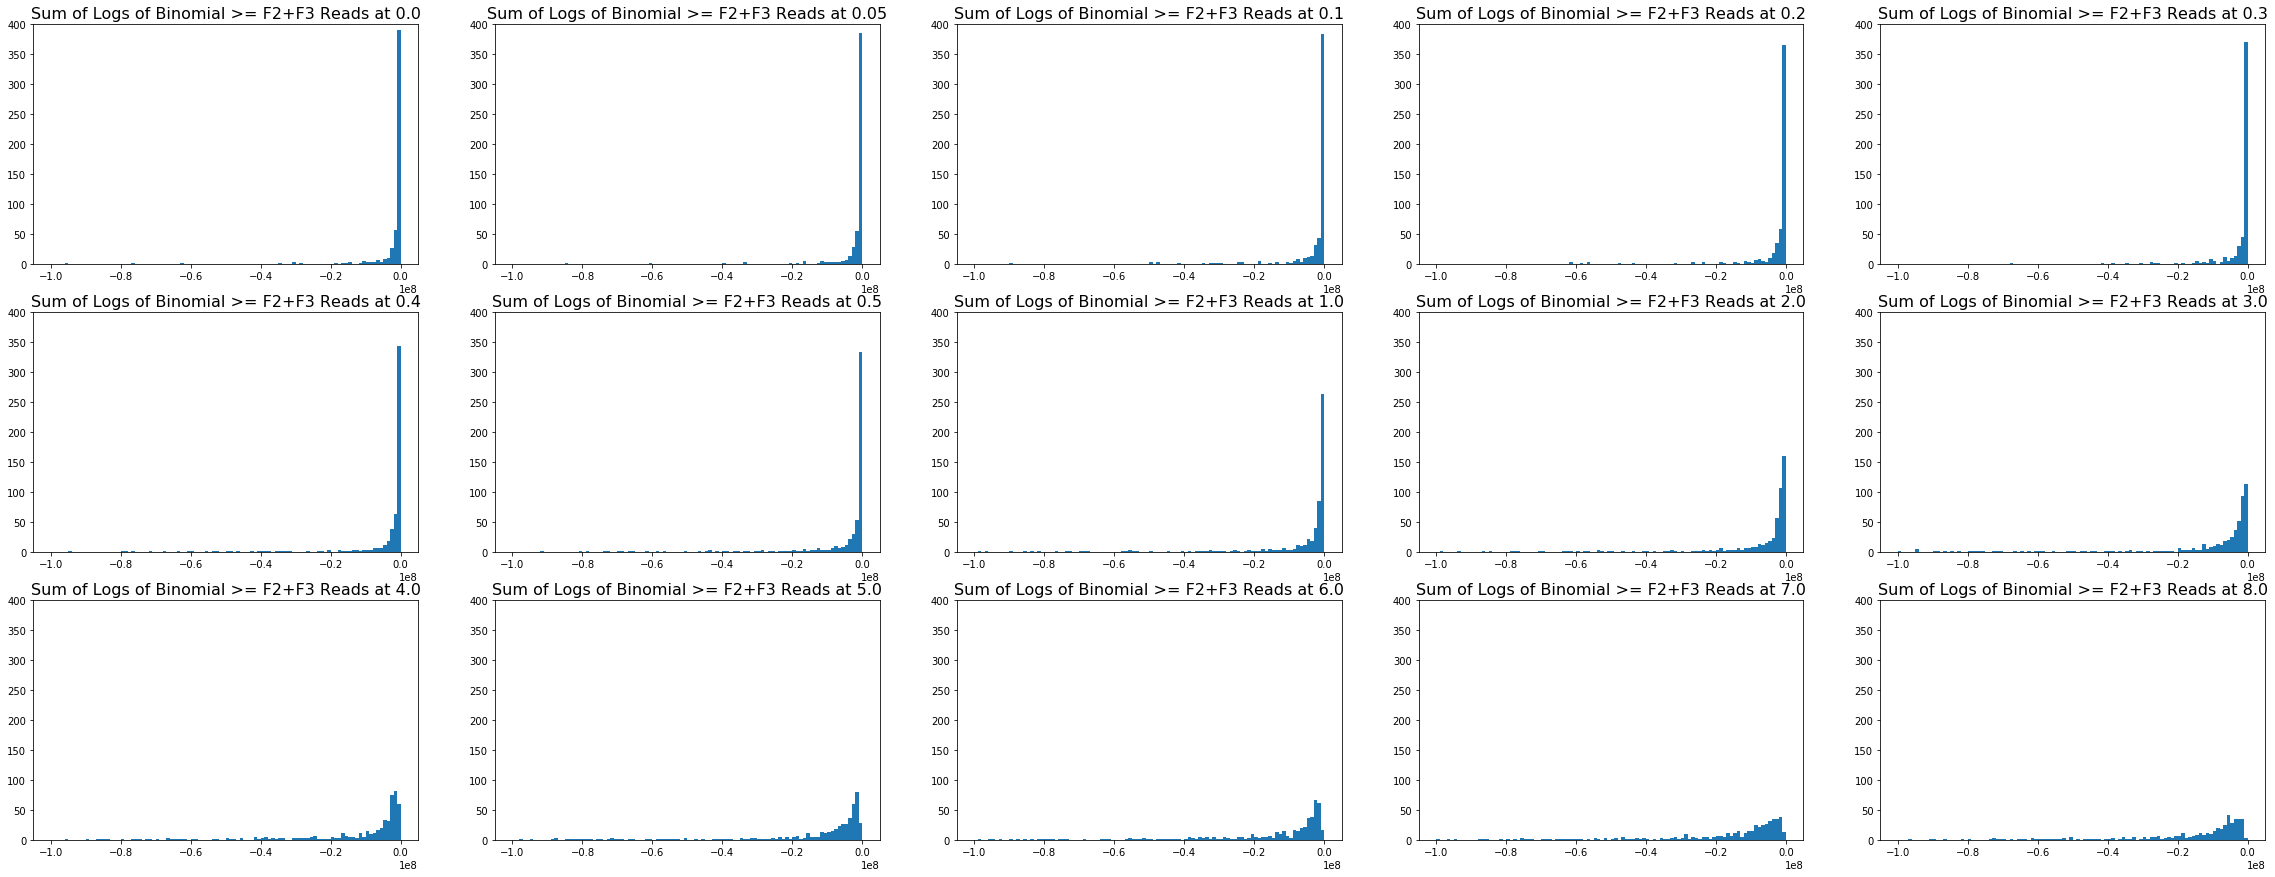

In [14]:
inFile = open("output/all_jan2014_25_to_32_starts_simulated_shifts_approach_5_theoretic_distributions", "r")
import matplotlib.pyplot as plt
from pylab import *
figure(figsize=(40,15))

level = inFile.readline().strip()
counter = 1
while level:
    dist = inFile.readline().strip().split(",")
    dist = [float(x) for x in dist[:-1]]
    ax=subplot(3, 5, counter)
    ax.hist(dist, bins = 100, range=(-100000000, 0.0))
    #if (level == "None"):
    #    print(sorted(dist))
    title("Sum of Logs of Binomial >= F2+F3 Reads at " + level,fontsize=16)
    counter+= 1
    level = inFile.readline().strip()
    ax.set_ylim([0,400])
show()

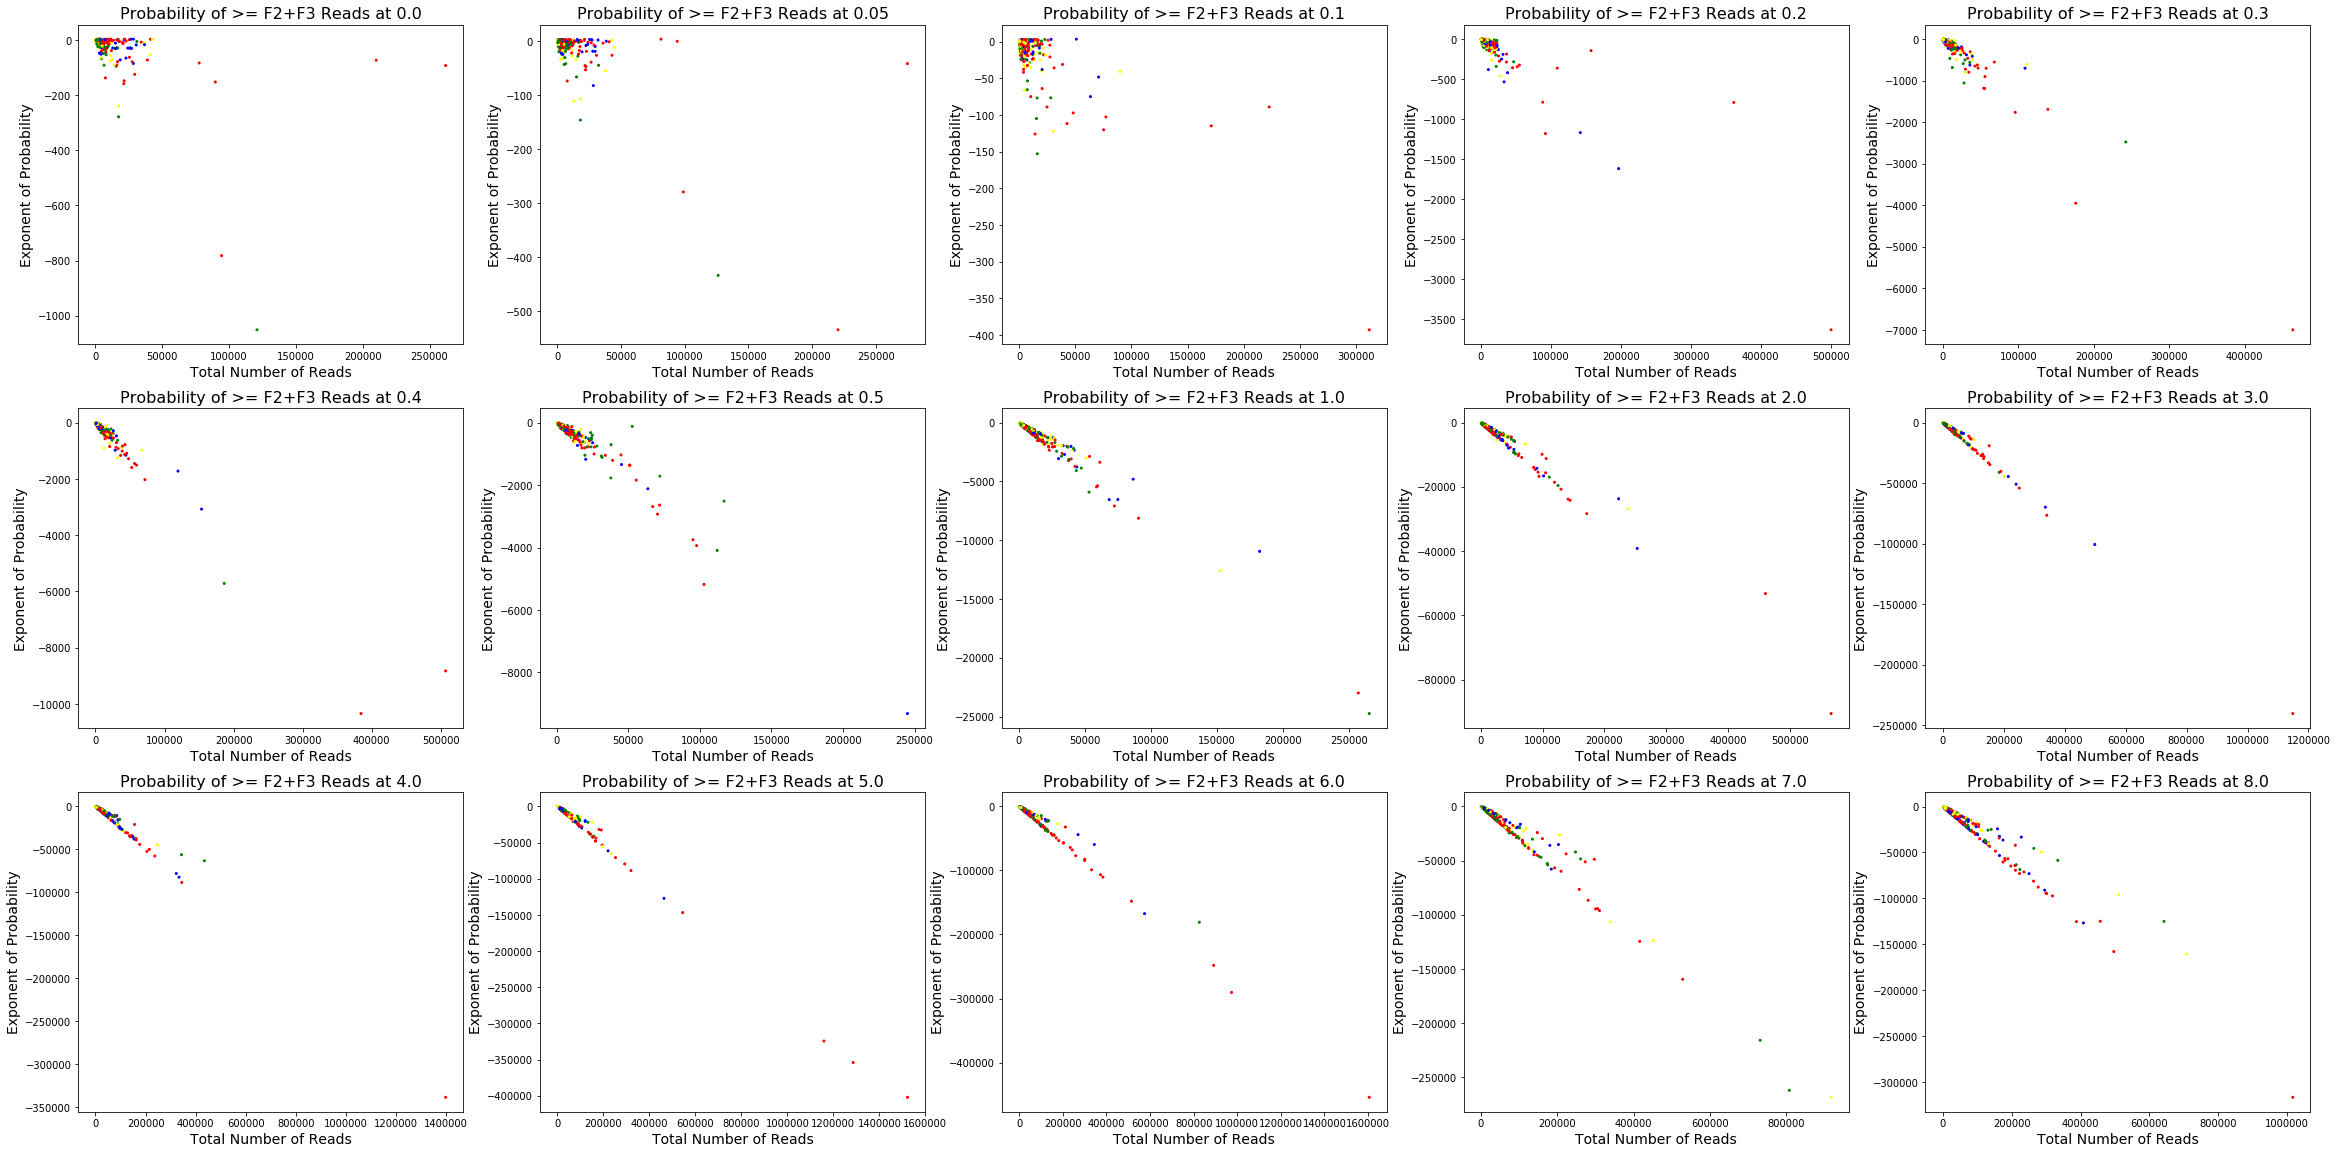

In [81]:
inFile = open("output/all_jan2014_25_to_32_starts_simulated_shifts_approach_5_averages_of_distributions", "r")
import matplotlib.pyplot as plt
from pylab import *
figure(figsize=(40,20))

level = inFile.readline().strip()
counter = 1
while level:
    xs = inFile.readline().strip().split(",")
    xs = [float(x) for x in xs[:-1]]
    ys = inFile.readline().strip().split(",")
    ys = [float(x) for x in ys[:-1]]
    colors = inFile.readline().strip().split(",")
    colors = colors[:-1]
    ax=subplot(3, 5, counter)
    ax.scatter(xs, ys, s=4, c =colors)
    title("Probability of >= F2+F3 Reads at " + level,fontsize=16)
    xlabel("Total Number of Reads",fontsize=14)
    ylabel("Exponent of Probability",fontsize=14)
    counter+= 1
    level = inFile.readline().strip()
    #ax.set_ylim([-2, 0])
    #ax.set_ylim([-800, 0])
    #ax.set_xlim([0,10000])
show()

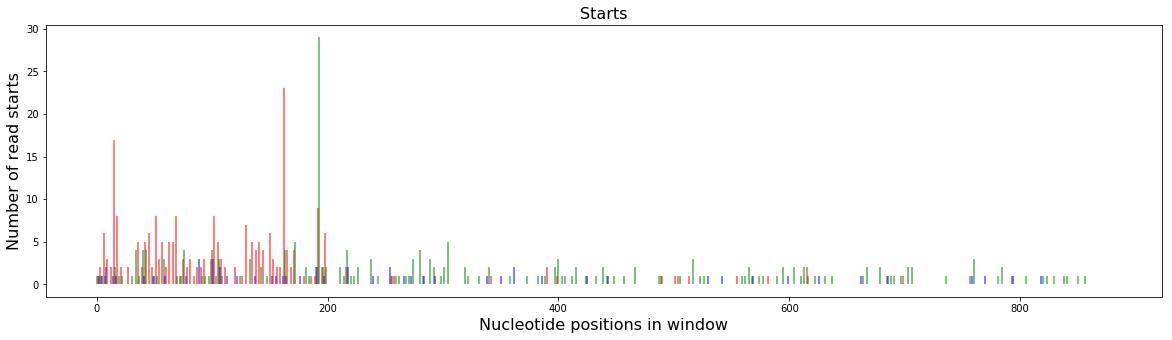

In [36]:
# conclusion from this graph:  Look at the real shifts this statistic rates beyond 10^(-40).   Do you believe these are real shifts?  Why or why not. I do not believe these are real shifts - random sampling of a small number of points...  I graphs do not look realistic;  I believe 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
unsimulated_starts_dict = dict()                                                                                                                             
inFile = open("output/all_jan2014_25_to_32_starts", "r")                                                                                                      
gene = inFile.readline().strip()                                                                                                                               
while gene:                                                                                                                                                    
    seq = inFile.readline()                                                                                                                                   
    starts_string = inFile.readline()                                                                                                                          
    current_gene = gene                                                                                                                                        
    gene = inFile.readline().strip()                                                                                                                           
    lineList = [int(x) for x in starts_string.strip()[:-1].split(",")]                                                                                               
    if (current_gene == "YPL052W"): #"YLR388W"): #"YDL061C"):
        lines = []
        for i in range(0, len(lineList)):  # YDL061C,87,140,-1,0.05; -54.349  #YLR388W,75,140,-1,0.05; -30.754
            pair=[(i,0), (i, lineList[i])]
            lines.append(pair)
        linecoll = matcoll.LineCollection(lines, colors=["red","green", "blue"], linewidths=[2], alpha=0.5)
        fig, ax = plt.subplots(figsize=(20, 5))
        ax.add_collection(linecoll)
        #plt.axvline(x=831, color='r', linestyle='-', lw=1)
        ax.autoscale_view()
        plt.title('Starts',fontsize=16)
        plt.xlabel('Nucleotide positions in window',fontsize=16)
        plt.ylabel('Number of read starts',fontsize=16)
        plt.show()

In [ ]:
# (3) Read about Bonferonic and false discovery rate to identify the right thresholds for what we call a shift.
# take desired p-value, divide by the number of trials to get the corrected p-value threshold alpha
# in our case, we will be looking at all possible frame 1 positions in the genes, so our upper bound on the number of hypothesis is 2337417, so at most we can decrease the p-value threshold by 10^-7, which is not a lot in our world....
# Benjamini–Hochberg procedure (False Discovery Rate Correct) is even less stringent, and assumes independence

In [86]:
# for higher percentage of f1 we get 
# 4) Repeat your analysis for a higher number than .72  -- do you get much fewer genes as significant
# weirdly we get more genes are siginificant - lower probabilities - confirmed by quick worlfram test....  (weirdly, making much lower number than .72 also makes genes more significant, just not as many genes...)
inFile = open("output/all_jan2014_25_to_32_starts_simulated_shifts_approach_5_averages_of_distributions_higherf1", "r")
import matplotlib.pyplot as plt
from pylab import *
figure(figsize=(40,20))

level = inFile.readline().strip()
counter = 1
while 0: level:
    xs = inFile.readline().strip().split(",")
    xs = [float(x) for x in xs[:-1]]
    ys = inFile.readline().strip().split(",")
    ys = [float(x) for x in ys[:-1]]
    colors = inFile.readline().strip().split(",")
    colors = colors[:-1]
    ax=subplot(3, 5, counter)
    ax.scatter(xs, ys, s=4, c =colors)
    title("Probability of >= F2+F3 Reads at " + level,fontsize=16)
    xlabel("Total Number of Reads",fontsize=14)
    ylabel("Exponent of Probability",fontsize=14)
    counter+= 1
    level = inFile.readline().strip()
    #ax.set_ylim([-2, 0])
    #ax.set_ylim([-800, 0])
    #ax.set_xlim([0,10000])
show()

SyntaxError: invalid syntax (<ipython-input-86-cf6bd7800fee>, line 9)

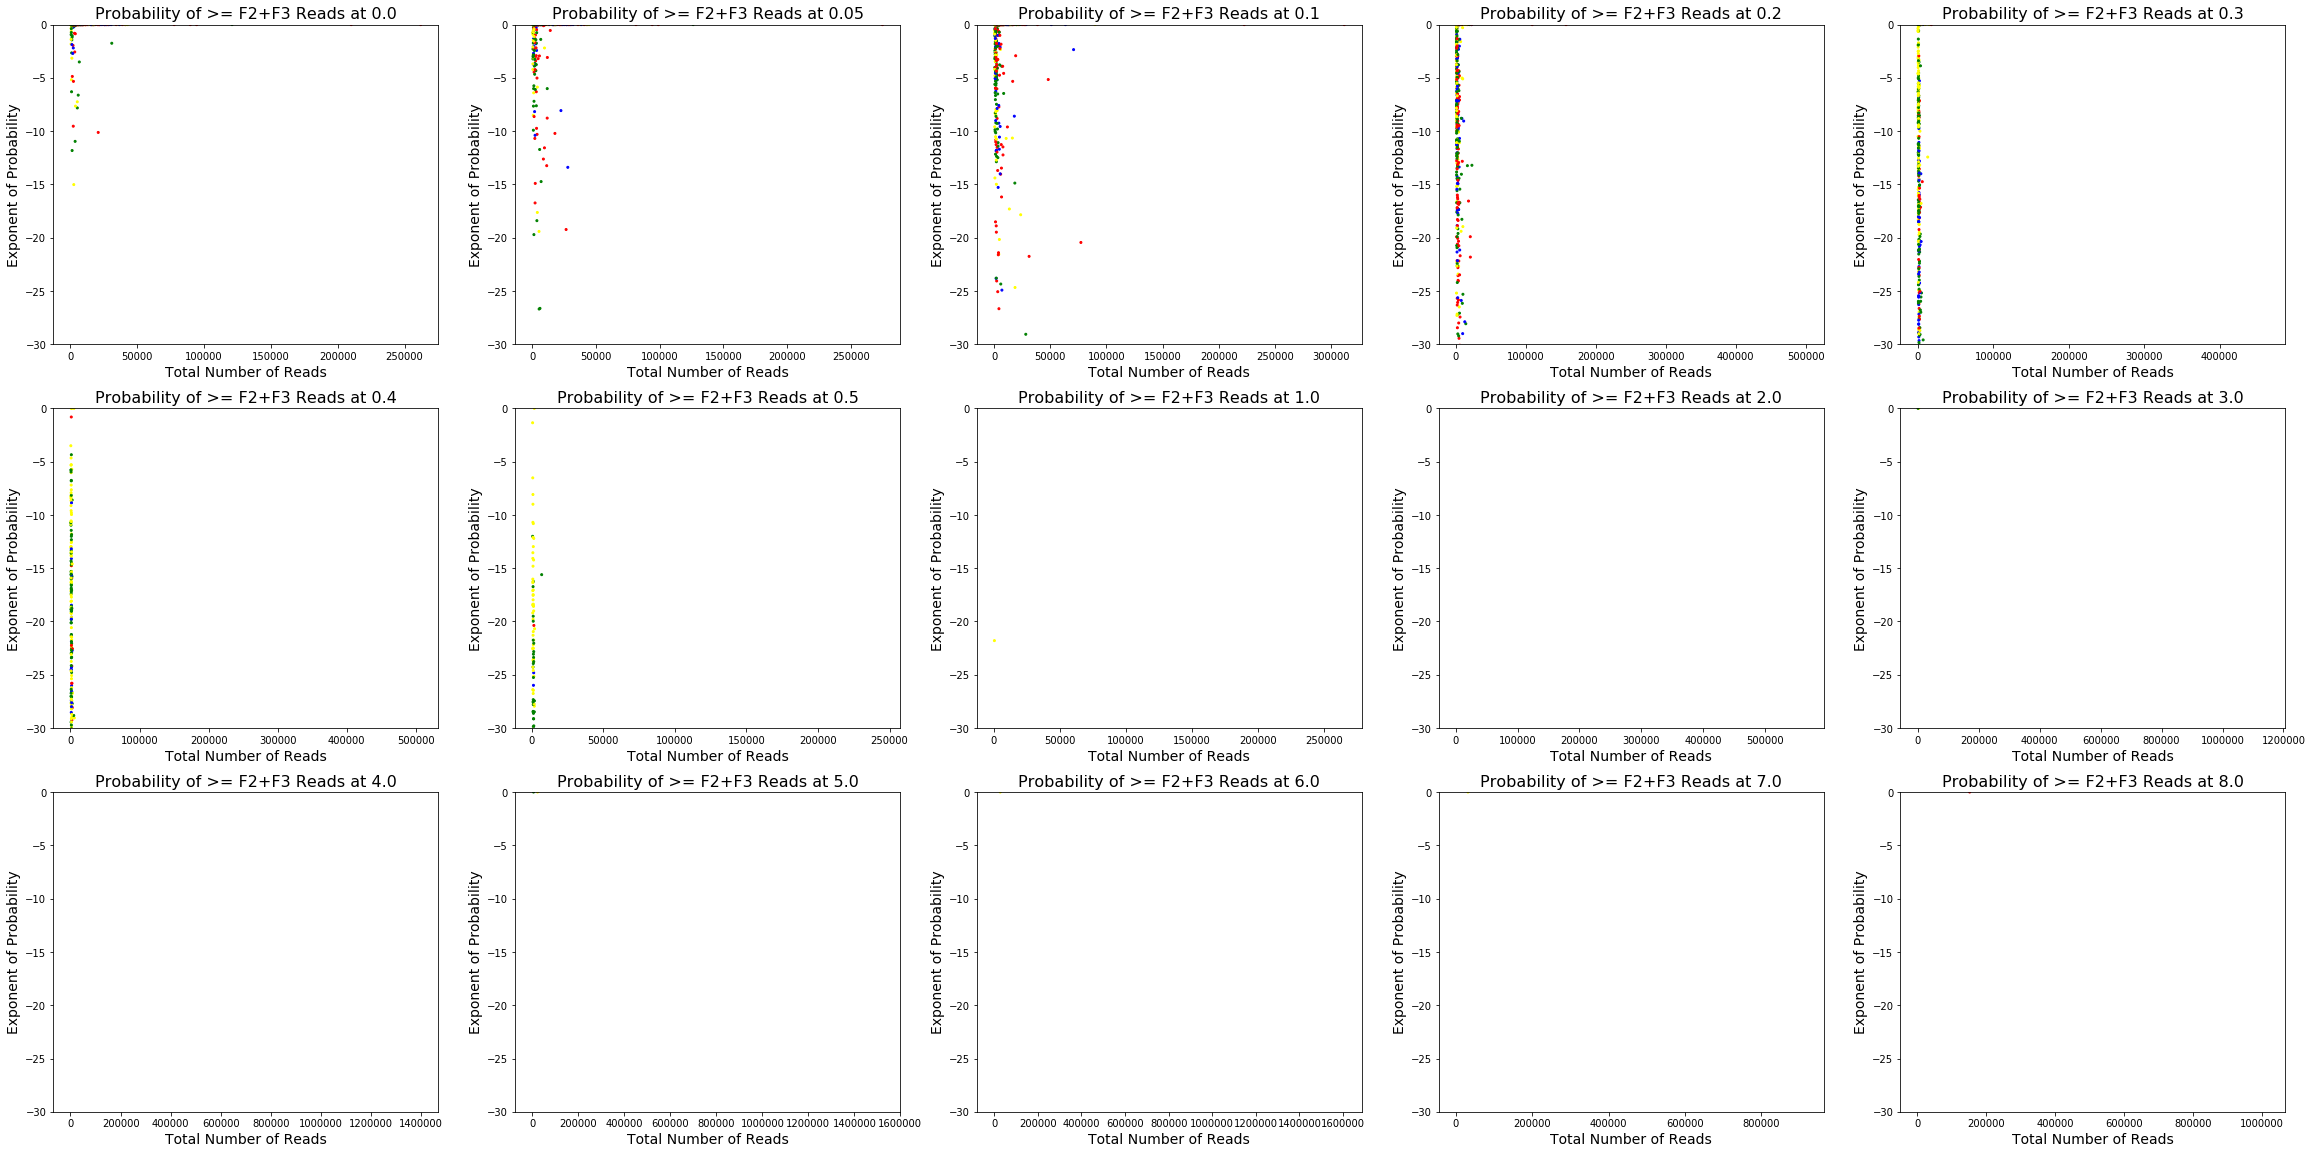

In [4]:
# odds ratio - probability of event / probability of non-event
# so, we will get prob of putative region minus prob of region right before it;  if < threshold, go for it!!!!
inFile = open("output/all_jan2014_25_to_32_starts_simulated_shifts_approach_5_averages_of_distributions_with_before", "r")
import matplotlib.pyplot as plt
from pylab import *
figure(figsize=(40,20))

level = inFile.readline().strip()
counter = 1
while level:
    xs = inFile.readline().strip().split(",")
    xs = [float(x) for x in xs[:-1]]
    ys = inFile.readline().strip().split(",")
    ys = [float(x) for x in ys[:-1]]
    colors = inFile.readline().strip().split(",")
    colors = colors[:-1]
    ax=subplot(3, 5, counter)
    ax.scatter(xs, ys, s=4, c =colors)
    title("Probability of >= F2+F3 Reads at " + level,fontsize=16)
    xlabel("Total Number of Reads",fontsize=14)
    ylabel("Exponent of Probability",fontsize=14)
    counter+= 1
    level = inFile.readline().strip()
    ax.set_ylim([-30, 0])
    #ax.set_ylim([-800, 0])
    #ax.set_xlim([0,10000])
show()